## Loading the necessary libraries
This loads the function for predecting synthesizability of materials plus all the Machine Learning and Deep Learning requirnments including: Keras, TensorFlow, Sklearn

In [5]:
from predict_synthesis import *
# To allow pandas display long filenames in the table. The default value is 50
pd.set_option('display.max_colwidth', 100)
pd.options.display.max_rows = 40

## Loading all the electrode materials candidates CIF files 
All the candidates were collected from the [MP Battery Explorer](https://materialsproject.org/#search/batteries/). 
These test samples can be any types of crystal structures. And it accepts any supperted format by the [ASE io.read()](https://wiki.fysik.dtu.dk/ase/ase/io/io.html). In case of using other formats you should mentioned when you use the CIF Parse or the synthesizability predictor.
```python
cif_parser(filename, format='vasp') # for parsing POSCAR
predict_crystal_synthesis(filename, format='cif')
```

In [8]:
cif_files = list_all_files('test_electrode_materials_samples/cif/', pattern=r'[0-9]*/*.cif')
pd.DataFrame(cif_files)

,0
0,test_electrode_materials_samples/cif/000/mp-1013899.cif
1,test_electrode_materials_samples/cif/000/mp-1176557.cif
2,test_electrode_materials_samples/cif/000/mp-1176596.cif
3,test_electrode_materials_samples/cif/000/mp-1178061.cif
4,test_electrode_materials_samples/cif/000/mp-1661648.cif
5,test_electrode_materials_samples/cif/000/mp-19755.cif
6,test_electrode_materials_samples/cif/000/mp-26221.cif
7,test_electrode_materials_samples/cif/000/mp-26546.cif
8,test_electrode_materials_samples/cif/000/mp-26611.cif
9,test_electrode_materials_samples/cif/000/mp-26789.cif


## Visualizer
Use below to visualize some of the electrode samples.
If you don't have [ngl viewer](http://nglviewer.org/nglview/latest/index.html) install it with this command: 
```bash
$ conda install nglview -c bioconda

```
If nothing didn't show up restart jupyter and try again and if still had a problem, try:
```bash
$ jupyter-nbextension enable nglview --py --sys-prefix
$ jupyter labextension install  nglview-js-widgets
```
Instead you can use 
```python
viewer='x3d'
```
as well.

In [9]:
from ase.visualize import view
from crystal_tools import cif_parser

crystal = cif_parser(cif_files[1])
view(crystal, viewer='ngl')
# view(crystal, viewer='x3d')
# view(crystal)

## Predicting synthesizability likelihood
Structures not meeting the constraint of the predictor can not be predicted. 

In [11]:
random.Random(0).shuffle(cif_files)
n_first_elements = 20
predictions = predict_crystal_synthesis(cif_files[:n_first_elements], save_tmp_encoded_atoms=True,
                                        redo_calc=False)

CAE: model/cae/
clf: model/classifiers/
Predicting     0/   20 : {'RandomForestClassifier': 1.0, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/019/mvc-6671.cif'}
Predicting     1/   20 : {'RandomForestClassifier': 0.96, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/004/mp-761527.cif'}
Predicting     2/   20 : {'RandomForestClassifier': 0.5006, 'MLPClassifier': 0.0877, 'filename': 'test_electrode_materials_samples/cif/002/mp-773085.cif'}
Predicting     3/   20 : {'RandomForestClassifier': 0.5033, 'MLPClassifier': 0.0733, 'filename': 'test_electrode_materials_samples/cif/011/mp-759780.cif'}
Predicting     4/   20 : {'RandomForestClassifier': 0.7618, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/001/mp-753637.cif'}
Predicting     5/   20 : {'RandomForestClassifier': 0.8806, 'MLPClassifier': 0.1231, 'filename': 'test_electrode_materials_samples/cif/020/mvc-11658.cif'}
Predicting     6/   20 : {'RandomForestClassi

In [12]:
predictions

,MLPClassifier,MLPClassifier_label,RandomForestClassifier,RandomForestClassifier_label,filename,RandomForestClassifier_best_threshold,MLPClassifier_best_threshold
0,1.0000,1.0,1.0000,1.0,test_electrode_materials_samples/cif/019/mvc-6671.cif,0.860895,0.999799
1,1.0000,1.0,0.9600,1.0,test_electrode_materials_samples/cif/004/mp-761527.cif,0.860895,0.999799
2,0.0877,-1.0,0.5006,-1.0,test_electrode_materials_samples/cif/002/mp-773085.cif,0.860895,0.999799
3,0.0733,-1.0,0.5033,-1.0,test_electrode_materials_samples/cif/011/mp-759780.cif,0.860895,0.999799
4,1.0000,1.0,0.7618,-1.0,test_electrode_materials_samples/cif/001/mp-753637.cif,0.860895,0.999799
5,0.1231,-1.0,0.8806,1.0,test_electrode_materials_samples/cif/020/mvc-11658.cif,0.860895,0.999799
6,1.0000,1.0,0.9800,1.0,test_electrode_materials_samples/cif/005/mp-753547.cif,0.860895,0.999799
7,1.0000,1.0,0.7608,-1.0,test_electrode_materials_samples/cif/011/mp-774490.cif,0.860895,0.999799
8,1.0000,1.0,0.5628,-1.0,test_electrode_materials_samples/cif/010/mp-1290754.cif,0.860895,0.999799
9,0.0479,-1.0,0.7603,-1.0,test_electrode_materials_samples/cif/006/mp-760794.cif,0.860895,0.999799


# Plotting the electrode properties vs. synthesizability likelihood
Loading the properties collected from the [MP Battery Explorer](https://materialsproject.org/#search/batteries/)

In [13]:

properties = load_var('test_electrode_materials_samples/properties.pkl')
types = list(properties['batteries'][0].keys())
for i in list(properties['batteries'][0].keys()):
    properties[i] = None
for t in types:
    l = []
    for i in range(len(properties)):
        l.append(properties['batteries'][i][t])
    properties[t] = pd.Series(l)
properties

,batteries,working_ion,battid,pretty_formula,material_id,reduced_cell_formula,average_voltage,min_voltage,max_voltage,nsteps,...,min_frac,max_frac,reduced_cell_composition,framework,adj_pairs,spacegroup,energy_grav,energy_vol,numsites,type
0,"{'battid': 'mp-504791_Li', 'reduced_cell_formula': 'P(WO4)2', 'average_voltage': 2.3251851700000...",Li,mp-504791_Li,None,None,P(WO4)2,2.325185,2.325185,2.325185,1,...,0.000000,0.083333,"{'P': 1.0, 'W': 2.0, 'O': 8.0}","{'reduced_cell_composition': {'P': 1.0, 'W': 2.0, 'O': 8.0}, 'unit_cell_composition': {'P': 1.0,...","[{'average_voltage': 2.3251851700000024, 'max_voltage': 2.3251851700000024, 'min_voltage': 2.325...","{'number': 19, 'hall_number': 115, 'international': 'P2_12_12_1', 'hall': 'P 2ac 2ab', 'choice':...",116.790816,626.085802,11.0,intercalation
1,"{'battid': 'mp-763480_Li', 'reduced_cell_formula': 'P3W2O13', 'average_voltage': 3.2917476950000...",Li,mp-763480_Li,LiP3W2O13,mp-758455,P3W2O13,3.291748,3.291748,3.291748,1,...,0.000000,0.052632,"{'P': 3.0, 'W': 2.0, 'O': 13.0}","{'reduced_cell_composition': {'P': 3.0, 'W': 2.0, 'O': 13.0}, 'unit_cell_composition': {'P': 3.0...","[{'average_voltage': 3.291747695000003, 'max_voltage': 3.291747695000003, 'min_voltage': 3.29174...","{'number': 14, 'hall_number': 81, 'international': 'P2_1/c', 'hall': '-P 2ybc', 'choice': 'b1'}",130.598387,507.639167,18.0,intercalation
2,"{'battid': 'mp-1176966_Li', 'reduced_cell_formula': 'P8W3O29', 'average_voltage': 3.609671179999...",Li,mp-1176966_Li,Li9P8W3O29,mp-776590,P8W3O29,3.609671,2.660169,5.062579,3,...,0.000000,0.183673,"{'P': 8.0, 'W': 3.0, 'O': 29.0}","{'reduced_cell_composition': {'P': 8.0, 'W': 3.0, 'O': 29.0}, 'unit_cell_composition': {'P': 8.0...","[{'average_voltage': 5.06257936249998, 'max_voltage': 5.06257936249998, 'min_voltage': 5.0625793...","{'number': 165, 'hall_number': 457, 'international': 'P-3c1', 'hall': '-P 3 2""c', 'choice': ''}",656.755144,2352.454095,40.0,intercalation
3,"{'battid': 'mvc-5592_Li', 'reduced_cell_formula': 'P2WO7', 'average_voltage': 3.2011691699999907...",Li,mvc-5592_Li,LiP2WO7,mp-753180,P2WO7,3.201169,3.201169,3.201169,1,...,0.000000,0.090909,"{'P': 2.0, 'W': 1.0, 'O': 7.0}","{'reduced_cell_composition': {'P': 2.0, 'W': 1.0, 'O': 7.0}, 'unit_cell_composition': {'P': 2.0,...","[{'average_voltage': 3.2011691699999907, 'max_voltage': 3.2011691699999907, 'min_voltage': 3.201...","{'number': 2, 'hall_number': 2, 'international': 'P-1', 'hall': '-P 1', 'choice': ''}",235.235410,1055.511733,10.0,intercalation
4,"{'battid': 'mp-763566_Li', 'reduced_cell_formula': 'P2WO7', 'average_voltage': 2.438309054999995...",Li,mp-763566_Li,LiP2WO7,mp-752528,P2WO7,2.438309,2.438309,2.438309,1,...,0.000000,0.090909,"{'P': 2.0, 'W': 1.0, 'O': 7.0}","{'reduced_cell_composition': {'P': 2.0, 'W': 1.0, 'O': 7.0}, 'unit_cell_composition': {'P': 2.0,...","[{'average_voltage': 2.4383090549999955, 'max_voltage': 2.4383090549999955, 'min_voltage': 2.438...","{'number': 4, 'hall_number': 6, 'international': 'P2_1', 'hall': 'P 2yb', 'choice': 'b'}",179.177232,746.321063,10.0,intercalation
5,"{'battid': 'mp-761353_Li', 'reduced_cell_formula': 'P4WO13', 'average_voltage': 4.32337751249999...",Li,mp-761353_Li,LiP4WO13,mp-757168,P4WO13,4.323378,3.414315,5.232440,2,...,0.000000,0.100000,"{'P': 4.0, 'W': 1.0, 'O': 13.0}","{'reduced_cell_composition': {'P': 4.0, 'W': 1.0, 'O': 13.0}, 'unit_cell_composition': {'P': 4.0...","[{'average_voltage': 5.2324398250000055, 'max_voltage': 5.2324398250000055, 'min_voltage': 5.232...","{'number': 1, 'hall_number': 1, 'international': 'P1', 'hall': 'P 1', 'choice': ''}",437.578922,1401.172489,18.0,intercalation
6,"{'battid': 'mp-763403_Li', 'reduced_cell_formula': 'P4WO13', 'average_voltage': 5.21025043999998...",Li,mp-763403_Li,LiP4WO13,mp-758454,P4WO13,5.210250,5.210250,5.210250,1,...,0.000000,0.052632,"{'P': 4.0, 'W': 1.0, 'O': 13.0}","{'reduced_cell_composition': {'P': 4.0, 'W': 1.0, 'O': 13.0}, 'unit_cell_composition': {'P': 4.0...","[{'average_vo

Plotting the properties

(0.0, 1.0, 0.0, 1.0)

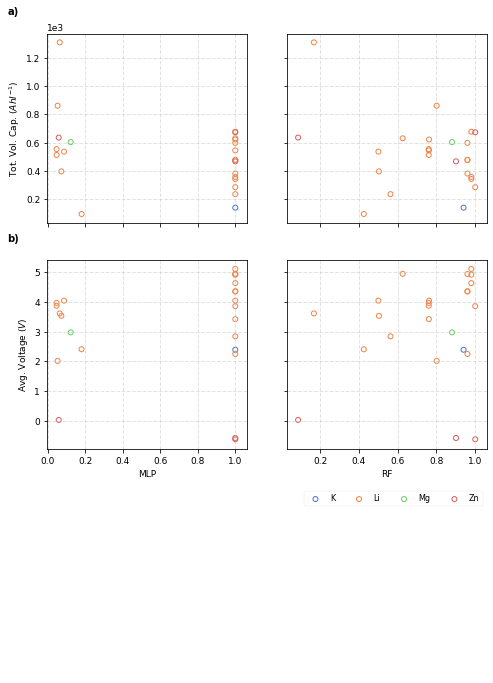

In [14]:
predictions['material_id'] = pd.Series([i.split('/')[-1].split('.cif')[0] for i in predictions['filename']])
df = predictions.merge(properties, on='material_id')
df = df.sample(frac=1)
df.reset_index(inplace=True)
df['Working ion'] = df['working_ion']
bat_dic = {
    'capacity_vol': 'Tot. Vol. Cap. ($AhI^{-1}$)',
    'average_voltage': 'Avg. Voltage ($V$)',
}
clf_labels = {
    'MLPClassifier': 'MLP',
    'RandomForestClassifier': 'RF',
    'BaggingClassifier': 'SVM-Bagging'
}
f, axs, fs = Plots.plot_format(200, equal_axis=True, ncols=2, nrows=3)
gs = axs[2, 0].get_gridspec()
# remove the underlying axes
for ax in axs[2, :]:
    ax.remove()
axbig = f.add_subplot(gs[2:, :])

plt_n = -1
clfs = ['MLPClassifier', 'RandomForestClassifier']
for p in bat_dic:
    df[p] = pd.Series([i[p] for i in df['batteries']])
    for c in clfs:
        plt_n += 1
        sub_plt_pos = np.unravel_index(plt_n, axs.shape)
        ax = axs[sub_plt_pos]
        pal = sns.color_palette("muted", np.unique(df['working_ion']).size)
        wi_order = np.unique(df['working_ion'])
        for wi in wi_order:
            ax.scatter(df[df['working_ion'] == wi][c],
                       df[df['working_ion'] == wi][p], s=25, facecolors='none', edgecolors=pal.pop(0),
                       linewidth=1., label=wi)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        if sub_plt_pos[1] == 0:
            ax.set_ylabel(bat_dic[p])
        else:
            Plots.remove_ticks(ax, axis='y', keep_ticks=True)
        if sub_plt_pos[0] == 1:
            ax.set_xlabel(f'{clf_labels[c]}')
        else:
            Plots.remove_ticks(ax, axis='x', keep_ticks=True)
        ax.grid()

Plots.annotate_subplots_with_abc(axs[:2, 0])
h, l = ax.get_legend_handles_labels()
axbig.legend(h, l, loc='best', ncol=4)
axbig.axis('off')
